# **Домашнее задание к семинару 02 (HW02)**

**Тема:** работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.

**Цель:** закрепить:
- базовые навыки работы с табличными данными в pandas.DataFrame;
- приёмы контроля качества данных (пропуски, дубликаты, подозрительные значения);
- минимальный Exploratory Data Analysis (EDA): описательные статистики, группировки и агрегаты;
- построение простых, но осмысленных графиков в Matplotlib (histogram, boxplot, scatter) и их сохранение;
- первый шаг к переносу этих приёмов на данные своего будущего проекта (опционально).

### **1. Загрузка данных и первичный осмотр**

**1.1 Импортировать необходимые библиотеки:**
- pandas (обязательно),
- при необходимости numpy,
- matplotlib.pyplot для визуализации.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1.2. Загрузить учебный датасет** 

- в pandas.DataFrame с помощью pd.read_csv (или другого подходящего метода).

In [6]:
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv"
df = pd.read_csv(url)
print('датасет успешно импортирован' if not df.empty else 'датасет не импортирован')

датасет успешно импортирован


**1.3 Вывести:**
- первые строки датасета (head()),
- информацию о столбцах и типах (info()),
- базовые описательные статистики (describe() или аналог).

In [9]:
display(df.head())     # просмотр первых строк датасета
display(df.info())     # просмотр информации о столбцах
display(df.describe()) # просмотр описательной статистики

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


None

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


***После первичного осмотра датасета было выявлено:***

1. *Структура данных*
- *набор данных состоит из 41 записи и 5 столбцов: user_id, age, country, purchases, revenue*

2. *Особенности данных*
- *в столбце age некорректный тип данных*
- *в столбце age обнаружено 2 пропуска*
- *в столбце age обнаружены некорректные значения: 5 и 120*
- *в столбце purchases обнаружено некорректное значение: -1*
- *в столбце revenue обнаружено некорректное значение: 0*

### **2. Пропуски, дубликаты и базовый контроль качества**

**2.1. Посчитать долю пропусков в каждом столбце (например, через isna().mean() или аналог).**

In [10]:
na_pct = df.isna().mean() * 100 # расчет доли пропусков в процентах
print(round(na_pct, 1))

user_id      0.0
age          4.9
country      0.0
purchases    0.0
revenue      0.0
dtype: float64


**2.2. Проверить наличие полностью дублирующих строк (через duplicated()).**

In [11]:
dups = df.duplicated() # построчная проверка дубликатов
dups_count = dups.sum() # поиск кол-ва дубликатов
print("кол-во дубликатов:", dups_count)
print(dups)

кол-во дубликатов: 1
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


**2.3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета.** 

Примеры:
- отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
- нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
- другие логические противоречия, характерные для конкретного датасета.

In [12]:
# поиск возраста вне реалистичных границ
age_bad = df[(df['age'] < 10) | (df['age'] > 100)]
print('записи с возрастом вне реалистичных границ')
display(age_bad)

# поиск отрицательных покупок
purch_neg = df[df['purchases'] < 0]
print('\nзаписи с отрицательными покупками')
display(purch_neg)

# поиск отрицательного дохода
rev_neg = df[df['revenue'] < 0]
print('\nзаписи с отрицательным доходом')
display(rev_neg)

# поиск нулевого дохода
rev_zero = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print('\nзаписи с нулевым доходом')
display(rev_zero)

записи с возрастом вне реалистичных границ


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488



записи с отрицательными покупками


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



записи с отрицательным доходом


,user_id,age,country,purchases,revenue



записи с нулевым доходом


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


**2.4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.**

*После проверки качества данных было выявлено несколько типов проблем. В столбце age обнаружено 4.9% пропусков, а также значения, выходящие за реалистичные пределы (5 и 120 лет); кроме того, сам столбец имеет тип float. В данных также присутствуют аномалии: отрицательное значение количества покупок (-1) и нулевой доход, что противоречит логике показателя. Помимо этого, найдена одна полностью дублирующаяся строка.*

### **3. Базовый EDA: группировки, агрегаты и частоты**

**3.1. Посчитать частоты для одной или двух категориальных переменных**
- например, value_counts() для столбца с категорией/страной/классом.

In [15]:
country_count = df['country'].value_counts()
print(country_count)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


**3.2. Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby:**
- например, среднее и сумму по количественным признакам в разрезе категорий.

In [16]:
# группировка по стране с поиском среднего, медианы и суммы в столбце purchases и revenue
group = df.groupby('country')[['purchases','revenue']].agg(['mean','median','sum'])
display(group)

purchases                 revenue               
             mean median sum         mean  median    sum
country                                                 
CN       4.500000    4.5   9  1054.000000  1054.0   2108
DE       6.500000    6.0  39  1445.500000  1200.0   8673
FR       4.250000    6.0  51   675.916667   619.5   8111
RU       4.769231    6.0  62   790.076923   650.0  10271
US       4.625000    4.0  37   557.375000   537.5   4459

**3.3. При необходимости ввести дополнительные «коридоры» (bins) или группировки**
- например, возрастные группы, диапазоны значений и т.п.

In [21]:
# создание возрастных групп
age_bins = [0, 20, 40, 60, 80, 120]
age_labels = ['0-20','21-40','41-60','61-80','81-120']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# группировка по возрастным группам и стране 
# с поиском среднего значения 
# в столбце purchases и revenue
age_country_group = df.groupby(['country','age_group'], observed=True)[['purchases','revenue']].mean()
print('\nсредние значения покупок и дохода по странам и возрастным группам')
display(age_country_group)


# группировка по возрастным группам и стране 
# с поиском количества пользователей
counts = df.groupby(['country','age_group'], observed=True).size().reset_index(name='user_count')
print('\nколичество пользователей по странам и возрастным группам')
display(counts)


средние значения покупок и дохода по странам и возрастным группам


purchases      revenue
country age_group                        
CN      0-20        7.000000  1652.000000
        21-40       2.000000   456.000000
DE      0-20        4.000000  1104.000000
        21-40       7.666667  1857.000000
        41-60       6.000000   702.000000
FR      21-40       4.833333   708.000000
        41-60       4.600000   615.600000
        81-120     -1.000000   785.000000
RU      0-20        8.000000  1488.000000
        21-40       5.000000   783.222222
        41-60       3.000000   578.000000
US      21-40       4.500000   438.750000
        41-60       3.333333   691.333333


количество пользователей по странам и возрастным группам


,country,age_group,user_count
0,CN,0-20,1
1,CN,21-40,1
2,DE,0-20,1
3,DE,21-40,3
4,DE,41-60,1
5,FR,21-40,6
6,FR,41-60,5
7,FR,81-120,1
8,RU,0-20,1
9,RU,21-40,9


**3.4. Кратко (1-2 абзаца) описать текстом основные наблюдения:**
- какие категории доминируют,
- как отличаются группы по средним значениям,
- есть ли неожиданные эффекты.

*Подсчет частот и группировок показал, что наибольшее число пользователей находится в стране "RU" и "FR", а наименьшее в "CN".*

*По возрастным группам видно, что пользователи от 0 до 20 лет совершают в среднем больше покупок, чем старшие группы. При этом их средний доход в некоторых странах значительно выше.*

*Группировки показали, что средние покупки и доход различаются между странами и возрастными группами; а также позволили выявить отрицательные покупки (-1) и аномально высокий возраст.*

### **4. Визуализация данных в Matplotlib**

**4.1. Построить как минимум одну гистограмму для количественного признака:**
- осмысленный выбор числа корзин (bins),
- подписи осей и заголовок.

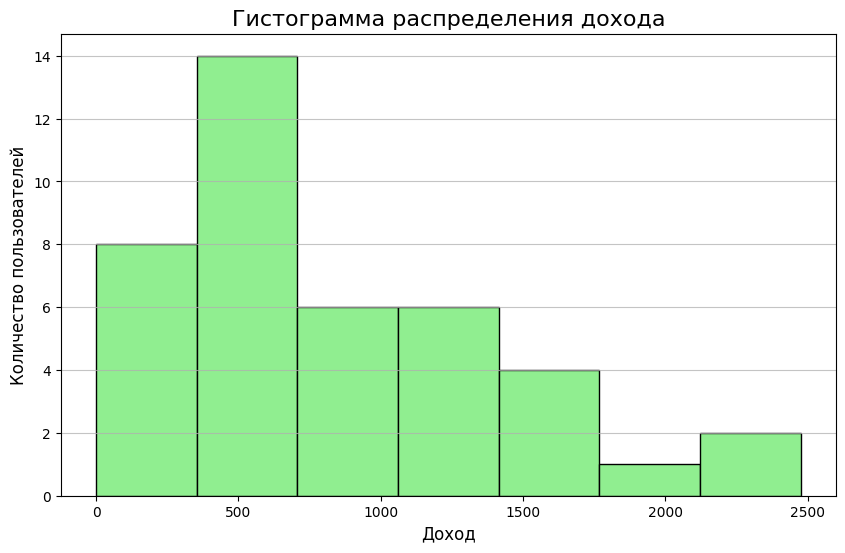

In [33]:
# применение правила Стерджеса для поиска оптимального числа корзин
n = len(df['revenue'])
bins_sturges = int(np.ceil(np.log2(n) + 1))

plt.figure(figsize=(10,6))
plt.hist(df['revenue'], bins=bins_sturges, color='lightgreen', edgecolor='black')
plt.title('Гистограмма распределения дохода', fontsize=16)
plt.xlabel('Доход', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.savefig(r'D:\Projects\aiengine\homeworks\HW02\figures\histogram_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

*Гистограмма показывает распределение значений дохода среди всех пользователей. Распределение несимметричное, со смещением вправо. Можно заметить, что основная масса пользователей имеет доход в диапазоне 0-1400 примерно. Нулевой доход является аномальным.*

**4.2. Построить как миниум один боксплот (boxplot) для количественного признака:**
- можно как общий, так и по группам (например, по категориям),
подписи оси и заголовок.

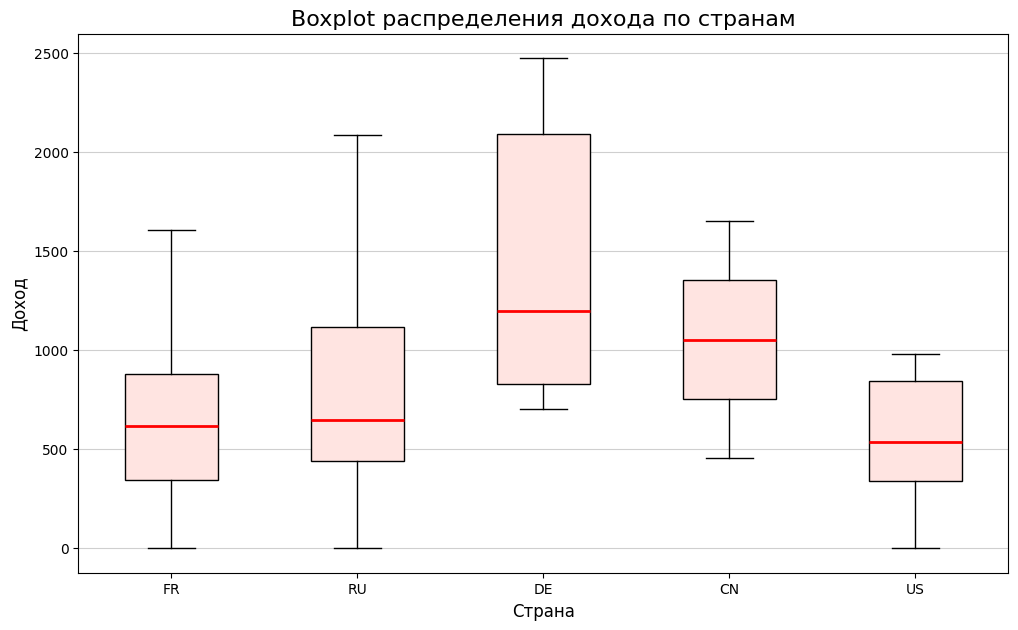

In [34]:
plt.figure(figsize=(12,7))
plt.boxplot(
    [df[df['country'] == c]['revenue'] for c in df['country'].unique()],
    tick_labels=df['country'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='mistyrose', color='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
plt.title('Boxplot распределения дохода по странам', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.6)
plt.savefig(r'D:\Projects\aiengine\homeworks\HW02\figures\boxplot_revenue_by_country.png',
            dpi=300, bbox_inches='tight')
plt.show()

*Боксплот позволяет сравнить распределение доходов между странами. Видно, что страны "DE" и "CN" демонстрируют более высокие медианные значения дохода. У стран "DE" и "RU" больший разброс, а у "FR", "RU" и "US" доходы распределены более компактно. В некоторых странах присутствуют выбросы: например, нулевое значение в странах "FR", "RU" и "US", связанное с некорректной записью покупок.*

**4.3. Построить как миниму один scatter plot (диаграмма рассеяния) для пары количественных признаков:**
- подписи обеих осей,
- заголовок,
- при желании можно добавить цвет/легенду для различения категорий.

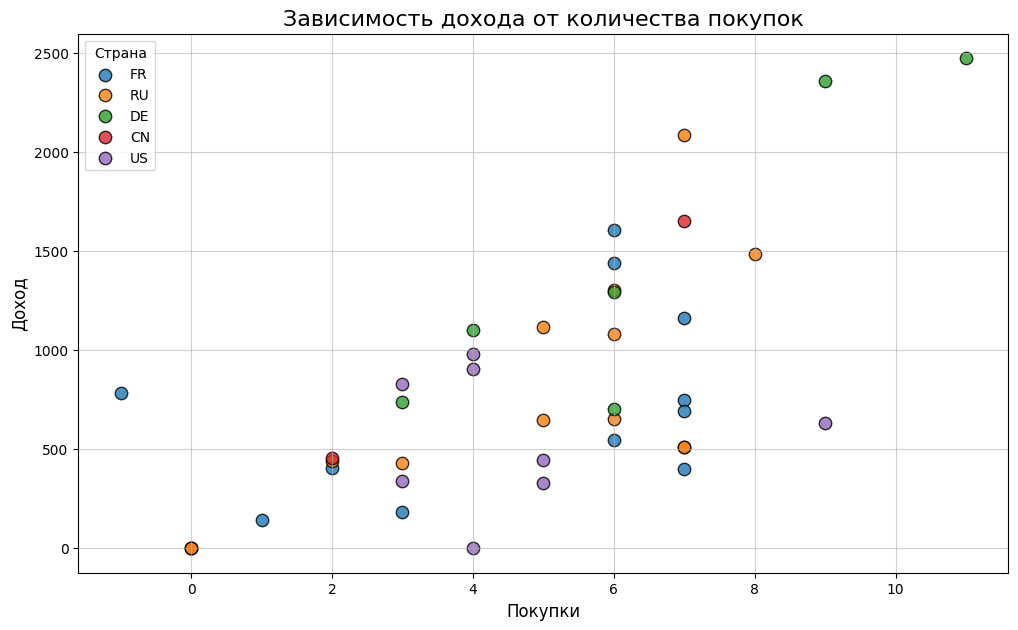

In [32]:
plt.figure(figsize=(12,7))
countries = df['country'].unique()
colors = plt.cm.tab10(range(len(countries)))
for c, col in zip(countries, colors):
    subset = df[df['country'] == c]
    plt.scatter(subset['purchases'], subset['revenue'], 
                color=col, label=c, s=80, alpha=0.8, edgecolor='black')
plt.title('Зависимость дохода от количества покупок', fontsize=16)
plt.xlabel('Покупки', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(alpha=0.6)
plt.legend(title='Страна')
plt.savefig(r'D:\Projects\aiengine\homeworks\HW02\figures\scatter_purchases_vs_revenue.png',
            dpi=300, bbox_inches='tight')
plt.show()

*Диаграмма рассеяния показывает связь между числом покупок и доходом. Видно положительную корреляцию между ними: чем больше покупок, тем выше доход, но не всех странах. Так, например, пользователи "DE" чаще попадают в область высоких доходов, а "US" в зону более низких. Также заметно несколько аномальных точек, среди которых нулевые покупки и нулевой доход.*

**4.4. Сохранить минимум один из построенных графиков в папку homeworks/HW02/figures/:**
- использовать plt.savefig(...) или аналог;
- убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.